In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
# Memuat dataset Walmart_Sales.csv
file_path = 'Walmart_Sales.csv'
data = pd.read_csv(file_path)

In [3]:
# Informasi dasar tentang dataset
# Menampilkan bentuk dataset dan 5 baris pertama untuk pemahaman awal
print("Dataset Shape:", data.shape)
print("\nFirst 5 Rows:\n", data.head())

Dataset Shape: (6435, 8)

First 5 Rows:
    Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [4]:
# Memilih fitur numerik yang relevan untuk clustering
# Fitur yang dipilih: Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment
features = ['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
X = data[features]

In [5]:
# Menangani nilai yang hilang (jika ada)
# Jika ada nilai kosong, isi dengan rata-rata kolom masing-masing
if X.isnull().sum().any():
    X = X.fillna(X.mean())

In [6]:
# Standarisasi fitur
# Menggunakan StandardScaler untuk menyamakan skala antar fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Menentukan jumlah cluster optimal menggunakan metode Elbow
# Menghitung inertia untuk berbagai jumlah cluster (k) dari 1 hingga 10
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

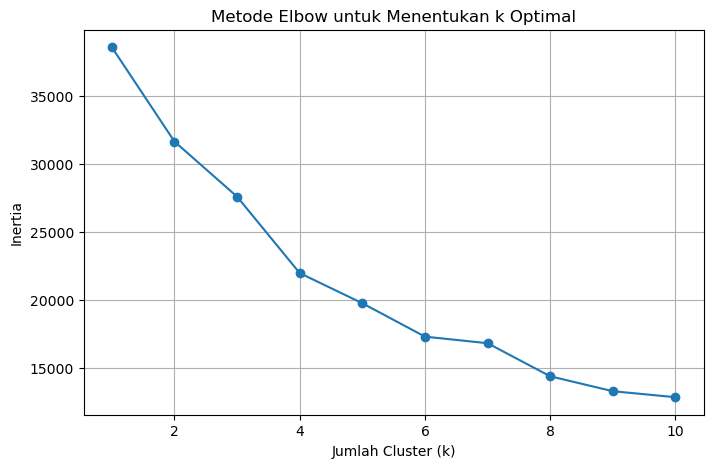

In [8]:
# Plot Elbow Curve
# Menampilkan grafik untuk menentukan jumlah cluster optimal berdasarkan metode Elbow
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [9]:
# Memilih jumlah cluster optimal (contoh: k=3) dan melatih model
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [10]:
# Menambahkan label cluster ke dataset asli
# Kolom baru 'Cluster' menunjukkan hasil clustering untuk setiap data
data['Cluster'] = kmeans.labels_

In [11]:
# Evaluasi model menggunakan Silhouette Score
# Mengukur kualitas clustering dengan skor Silhouette
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score untuk k={optimal_k}: {silhouette_avg:.2f}")

Silhouette Score untuk k=3: 0.21


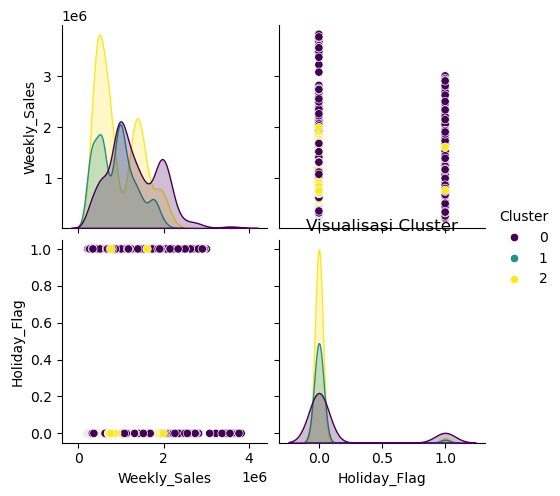

In [12]:
# Visualisasi hasil clustering
# Menggunakan pairplot untuk menampilkan clustering pada dua fitur pertama
sns.pairplot(data, vars=features[:2], hue='Cluster', palette='viridis')
plt.title('Visualisasi Cluster')
plt.show()

In [13]:
# Menyimpan dataset dengan label cluster ke file baru
# File ini berisi data asli dengan tambahan kolom "Cluster"
data.to_csv('Walmart_Clustered.csv', index=False)